In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [99]:
Fs = 1000  # [Hz] sample rate (cantidad de samples que tomamos por segundo)
Ts = 1/Fs  # [s] sample period
duracion = 1  # [s]
N = Fs*duracion  # [samples] cantidad de samples que tomamos en total
sps = 8  # [samples/symbol] cantidad de samples por simbolo

print("Cantidad de bits: ", N)

Cantidad de bits:  1000


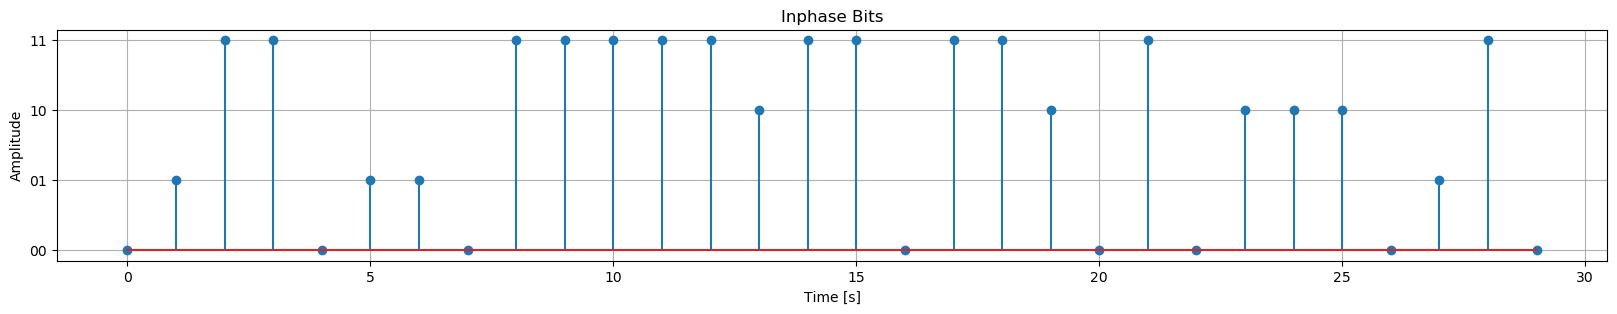

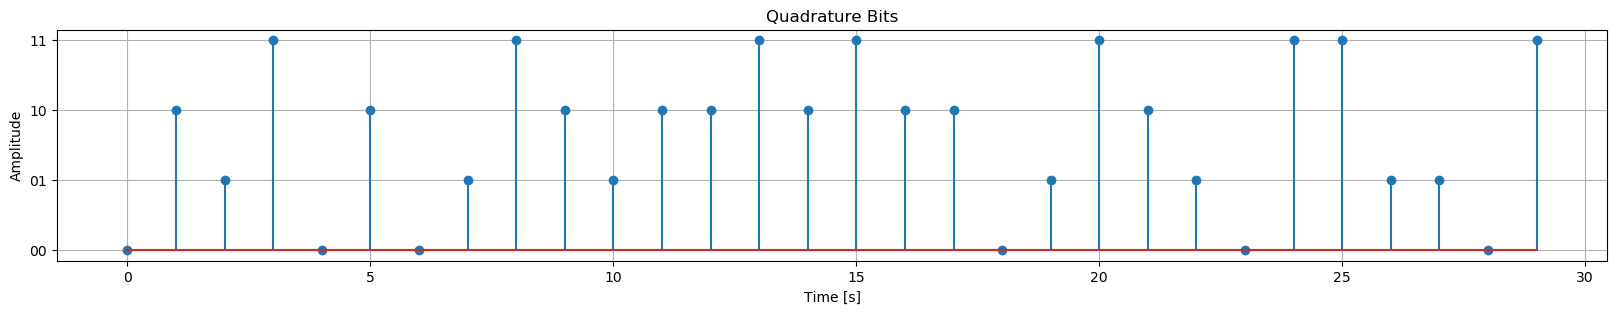

In [212]:
from matplotlib.ticker import StrMethodFormatter

i_bits = np.random.randint(0, 4, N)  # [0, 1] bits aleatorios
q_bits = np.random.randint(0, 4, N)  # [0, 1] bits aleatorios


fig_i, ax_i = plt.subplots(figsize=(20, 3))
ax_i.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax_i.yaxis.set_ticks(np.arange(0, 11, 1))
ax_i.set_title("Inphase Bits")
ax_i.set_xlabel("Time [s]")
ax_i.set_ylabel("Amplitude")
plt.stem(i_bits[0:30], use_line_collection=True)
plt.grid(True)
plt.show()

fig_q, ax_q = plt.subplots(figsize=(20, 3))
ax_q.yaxis.set_major_formatter(StrMethodFormatter("{x:02b}"))
ax_q.yaxis.set_ticks(np.arange(0, 11, 1))
ax_q.set_title("Quadrature Bits")
ax_q.set_xlabel("Time [s]")
ax_q.set_ylabel("Amplitude")
plt.stem(q_bits[0:30], use_line_collection=True)
plt.grid(True)
plt.show()

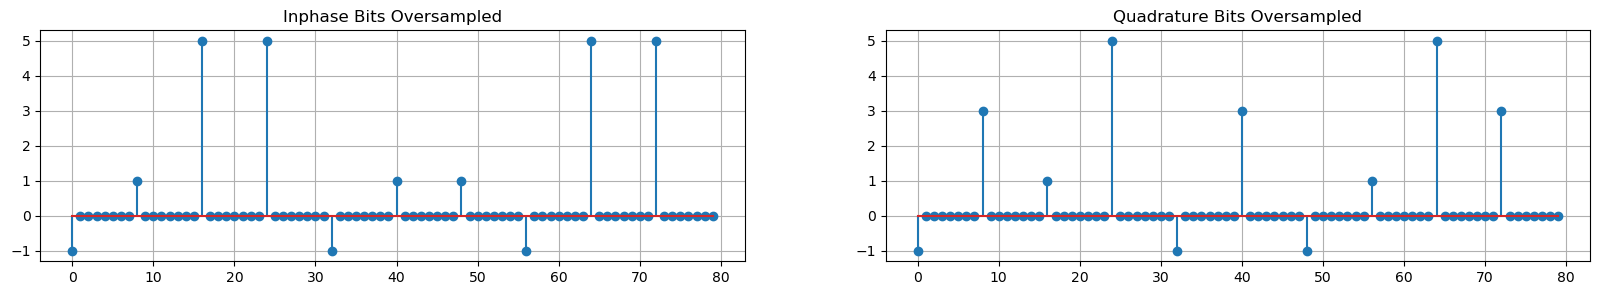

In [214]:

osample_i = np.array([])
for bit in i_bits:
    pulse = np.zeros(sps)  # "relleno" un array de 8 bits con 0
    # el primer elemento va a ser el valor del bit, con NRZ(0->-1, 1->1)
    pulse[0] = bit*2 - 1
    # concateno el array de 8 bits con el array de bits
    osample_i = np.concatenate((osample_i, pulse))

osample_q = np.array([])
for bit in q_bits:
    pulse = np.zeros(sps)  # "relleno" un array de 8 bits con 0
    # el primer elemento va a ser el valor del bit, con NRZ(0->-1, 1->1)
    pulse[0] = bit*2 - 1
    # concateno el array de 8 bits con el array de bits
    osample_q = np.concatenate((osample_q, pulse))

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.stem(osample_i[0:80], use_line_collection = True)
plt.title("Inphase Bits Oversampled")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.stem(osample_q[0:80], use_line_collection = True)
plt.title("Quadrature Bits Oversampled")
plt.grid(True)
plt.show()


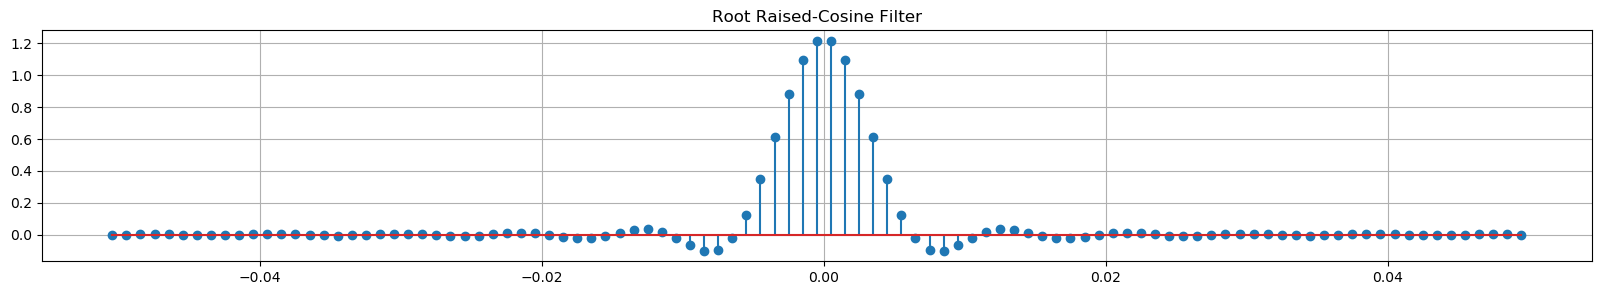

In [215]:
from commpy.filters import rrcosfilter

length = 101
beta = 0.85
Tsym = sps/Fs

t_rrc, h_rrc = rrcosfilter(length, beta, Tsym, Fs)
#t_rrc:  Array containing the time indices, in seconds, for the impulse response.
#h_rrc:  Array containing the impulse response values.

plt.figure(figsize=(20, 3))
plt.stem(t_rrc, h_rrc, use_line_collection = True)
plt.title("Root Raised-Cosine Filter")
plt.grid(True)
plt.show()

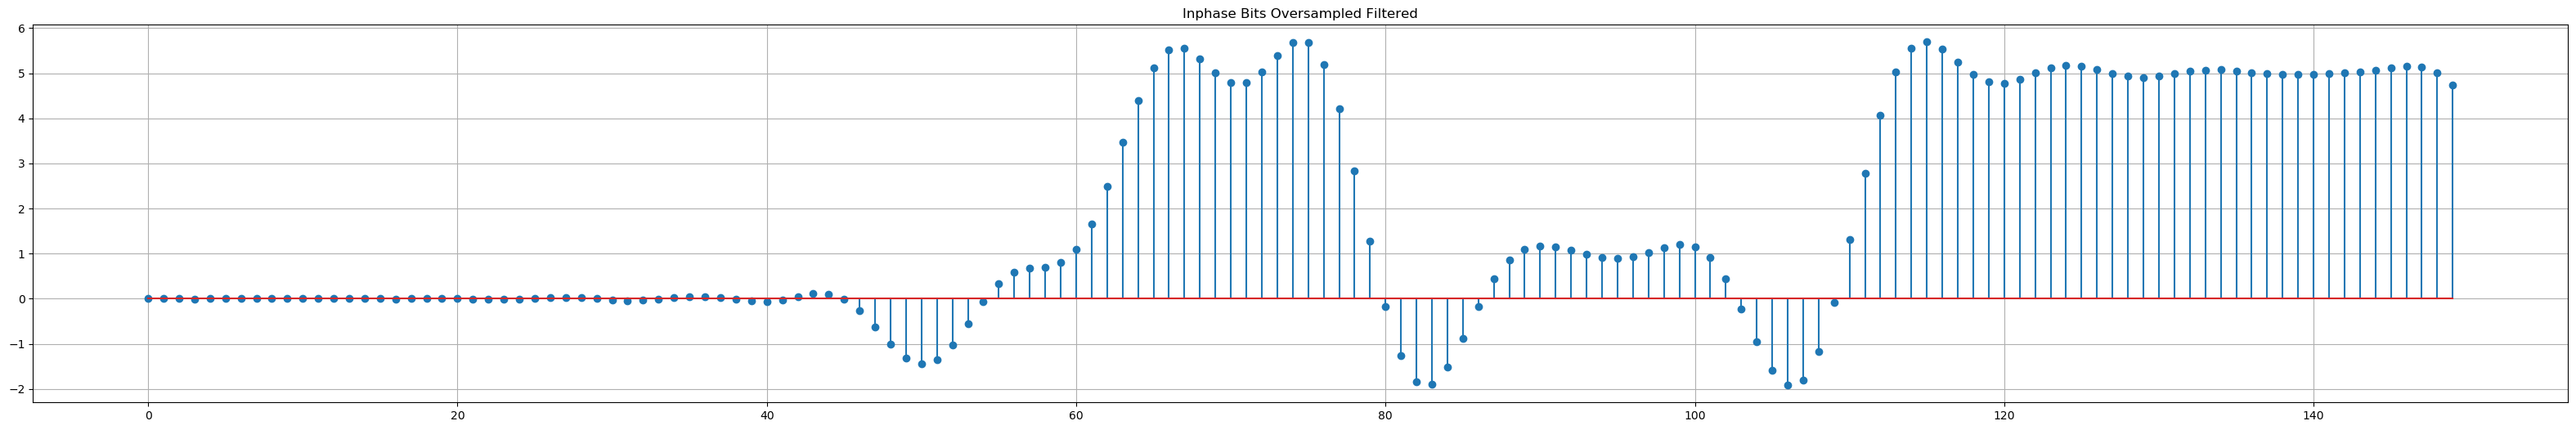

In [216]:
i_filtered = signal.convolve(osample_i, h_rrc)
plt.figure(figsize=(40, 6))
plt.stem(i_filtered[0:150], use_line_collection = True)
plt.title("Inphase Bits Oversampled Filtered")
plt.grid(True)
plt.show()